Линейная регрессия — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с линейной функцией зависимости.

Пусть дана выборка объёмом n наблюдений переменных $y$ и $x$. Обозначим $t$ — номер наблюдения в выборке. Тогда $y_{t}$ — значение переменной $y$ в $t$-м наблюдении, $x_{tj}$ — значение $j$-го фактора в $t$-м наблюдении. Соответственно, $x_{t} = (x_{t1},x_{t2},...,x_{tk})$  — вектор регрессоров в t-м наблюдении. Тогда линейная регрессионная зависимость имеет место в каждом наблюдении:

$y_{pred} = x * W + b$

Значения параметров в случае линейной регрессии находят с помощью метода наименьших квадратов.

$ loss(W, b) = \frac{1}{n} \sum{ (y - y_{pred}(W, b))^2}$


$ W, b = argmin_{W, b}(loss) $

In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


C:\Users\panov\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


$y_{pred} = X * W + b$

$ loss = \frac{1}{n} \sum{ (y - y_{pred})^2}$

In [2]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b) # write your code here

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/ n_samples # write your code here


In [3]:
grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

new_W = W - learning_rate * grad_W # write your code here
new_b = b - learning_rate * grad_b# write your code here

compute_new_W = W.assign(new_W)
compute_new_b = b.assign(new_b)


Epoch: 0050 cost= 80.583885193 W= 0.6395962 b= -1.0293531
Epoch: 0100 cost= 1.325218320 W= 0.5237522 b= -1.0411223
Epoch: 0150 cost= 0.580766618 W= 0.51197094 b= -1.0382242
Epoch: 0200 cost= 0.571776211 W= 0.5102626 b= -1.0339164
Epoch: 0250 cost= 0.569684625 W= 0.50953054 b= -1.0294819
Epoch: 0300 cost= 0.567667603 W= 0.5088944 b= -1.0250449
Epoch: 0350 cost= 0.565660894 W= 0.5082689 b= -1.0206174
Epoch: 0400 cost= 0.563663900 W= 0.5076458 b= -1.0162004
Epoch: 0450 cost= 0.561676502 W= 0.5070243 b= -1.0117942
Epoch: 0500 cost= 0.559698820 W= 0.5064043 b= -1.0073987
Epoch: 0550 cost= 0.557730675 W= 0.50578576 b= -1.0030138
Epoch: 0600 cost= 0.555772245 W= 0.5051688 b= -0.99863964
Epoch: 0650 cost= 0.553823113 W= 0.50455326 b= -0.99427605
Epoch: 0700 cost= 0.551883519 W= 0.5039393 b= -0.98992306
Epoch: 0750 cost= 0.549953341 W= 0.5033268 b= -0.9855806
Epoch: 0800 cost= 0.548032522 W= 0.50271577 b= -0.98124874
Epoch: 0850 cost= 0.546121001 W= 0.5021062 b= -0.9769274
Epoch: 0900 cost= 0.5

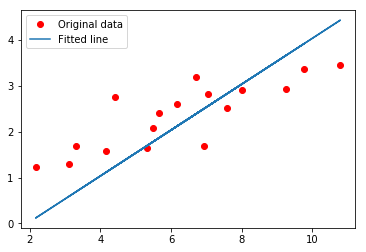

Testing... (Mean square loss Comparison)
Testing cost= 0.48232526
Absolute mean square loss difference: 0.05624187


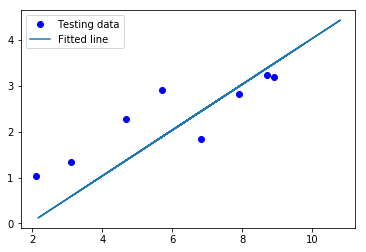

In [4]:


# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        if (epoch+1) % display_step == 0:
            _, _, c = sess.run([compute_new_W, compute_new_b, cost], feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / test_X.shape[0],
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()